In [153]:
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
dataset = pd.read_csv('data/LogisticRegressionData.csv')
dataset.head()

,hour,pass
0,0.5,0
1,1.2,0
2,1.8,0
3,2.4,0
4,2.6,0


In [155]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X.shape, y.shape

((20, 1), (20,))

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [157]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [158]:
import numpy as np
for hour in np.arange(4.0, 5.0, 0.1):
    pred=logistic.predict([[hour]])
    print(f'{hour:.1f}:{pred[0]}')

4.0:0
4.1:0
4.2:0
4.3:0
4.4:0
4.5:1
4.6:1
4.7:1
4.8:1
4.9:1


In [159]:
df = pd.read_csv('data/로지스틱회귀.csv')
df

,이름,공부시간
0,홍길동,4.2
1,강감찬,5.1
2,이순신,4.5
3,성춘향,7.2
4,이몽룡,2.8


In [160]:
X = df[['hour']].values
X.shape

KeyError: "None of [Index(['hour'], dtype='object')] are in the [columns]"

In [ ]:
y_pred = logistic.predict(X)
y_pred

array([0, 1, 1, 1])

In [ ]:
df['pass'] = y_pred
df['합격여부'] = df['pass'].apply(lambda x:'합격' if x==1 else '불합격')
df

,name,hour,pass,합격여부
0,홍길동,4.2,0,불합격
1,강감찬,5.1,1,합격
2,이순신,4.5,1,합격
3,성춘향,7.2,1,합격


In [ ]:
logistic.score(X_train, y_train)

0.875

In [ ]:
import numpy as np
x_range = np.arange(0, 10.1, 0.1)
x_range

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [ ]:
#y = mx + b
y = logistic.coef_ * x_range + logistic.intercept_
#p = 1 / (1 + e^-y)
p = 1 / (1 + np.exp(-y))
y_range=p.reshape(p.shape[1])
y_range.shape

(101,)

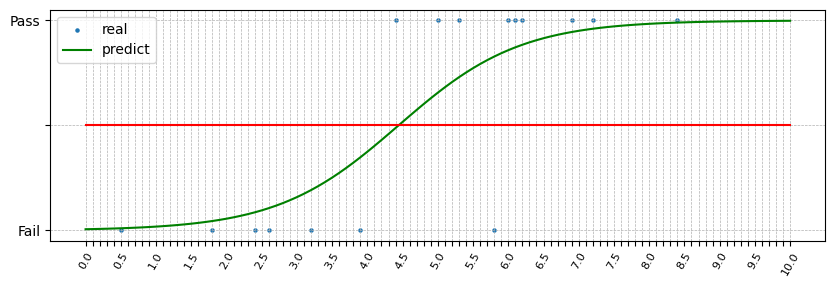

In [ ]:
plt.figure(figsize=(10,3))
plt.scatter(X_train, y_train, label='real', s=5)
plt.plot(x_range, y_range, color='g', label='predict')
plt.plot(x_range, np.full(len(x_range), 0.5), color='red')
xticks = [x for x in np.arange(0, 10.1, 0.1)]
xlabel = [x if x%0.5==0 else '' for x in xticks ]
plt.xticks(xticks, labels=xlabel, rotation=60, size=8)
plt.yticks([0, 0.5, 1], ['Fail','', 'Pass'])
plt.grid(True, ls='--', lw=0.5)
plt.legend()
plt.show()

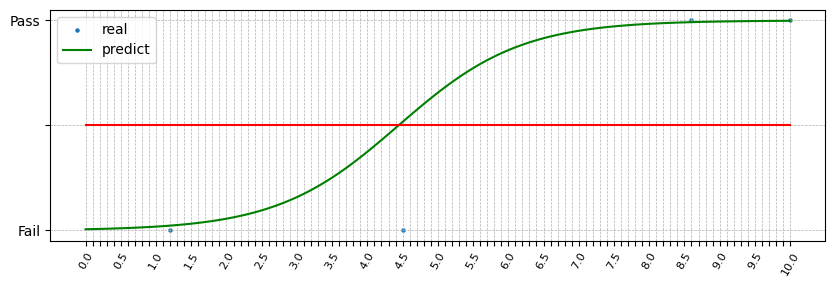

In [ ]:
plt.figure(figsize=(10,3))
plt.scatter(X_test, y_test, label='real', s=5)
plt.plot(x_range, y_range, color='g', label='predict')
plt.plot(x_range, np.full(len(x_range), 0.5), color='red')
xticks = [x for x in np.arange(0, 10.1, 0.1)]
xlabel = [x if x%0.5==0 else '' for x in xticks ]
plt.xticks(xticks, labels=xlabel, rotation=60, size=8)
plt.yticks([0, 0.5, 1], ['Fail','', 'Pass'])
plt.grid(True, ls='--', lw=0.5)
plt.legend()
plt.show()

In [ ]:
y_pred = logistic.predict(X_test)
y_pred, y_test

(array([1, 0, 1, 1]), array([1, 0, 1, 0]))

In [ ]:
y_pred = logistic.predict(X_train)
y_pred, y_train

(array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1]),
 array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1]))

In [ ]:
y_pred = logistic.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 1],
       [0, 2]])

In [ ]:
true=cm[0,0]+cm[1,1]
print(f'정답수:{true}')

정답수:3


In [ ]:
y_pred = logistic.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
cm

array([[6, 1],
       [1, 8]])

In [ ]:
true = cm[0][0] + cm[1][1]
print(f'정답수:{true}')

정답수:14


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y_pred = logistic.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
cm = confusion_matrix(y, y_pred)
cm

array([[ 7,  2],
       [ 1, 10]])

In [ ]:
true = cm[0][0] + cm[1][1]
print(f'정답수:{true}')

정답수:17


In [ ]:
logistic.score(X, y), 17/20

(0.85, 0.85)

In [ ]:
df = dataset.copy()
df['predict']=y_pred
filt = df['pass'] != df['predict']
df[filt]

,hour,pass,predict
7,4.4,1,0
8,4.5,0,1
11,5.8,0,1


In [ ]:
import pandas as pd
df = pd.read_csv('data/로지스틱회귀.csv')
df

,이름,공부시간
0,홍길동,4.2
1,강감찬,5.1
2,이순신,4.5
3,성춘향,7.2
4,이몽룡,2.8


In [ ]:
X = df.loc[:, '공부시간'].values
X2 = X.reshape(len(X), 1)
y_pred = logistic.predict(X2)
y_pred_proba = logistic.predict_proba(X2)
df['pass'] = y_pred
df['합격예상'] = df['pass'].apply(lambda x:'합격' if x==1 else '불합격')
y_pred_proba = logistic.predict_proba(X2)
y_pred_pass = [f'{y[1]*100:.2f}%' for y in y_pred_proba]
df['예상합격율'] = y_pred_pass
df.drop(columns='pass', inplace=True)
df

,이름,공부시간,합격예상,예상합격율
0,홍길동,4.2,불합격,43.06%
1,강감찬,5.1,합격,68.18%
2,이순신,4.5,합격,51.69%
3,성춘향,7.2,합격,96.05%
4,이몽룡,2.8,불합격,13.02%


In [ ]:
y_pred_proba = logistic.predict_proba(X2)
y_pred_pass = [f'{y[1]*100:.2f}%' for y in y_pred_proba]
y_pred_pass

['43.06%', '68.18%', '51.69%', '96.05%', '13.02%']

In [ ]:
import pandas as pd
stu = pd.read_csv('data/학사관리/학생.csv')
names_stu = list(stu['학생이름'].values)
names_stu

['서연우', '김창덕', '이지행', '김형명', '이원구', '이재영', '박혜경', '김수정', '홍길동']

In [ ]:
pro = pd.read_csv('data/학사관리/교수.csv')
names_pro = list(pro['교수이름'].values)
names_pro

['이병렬', '이재광', '강승일', '오문환']

In [ ]:
names = names_stu + names_pro
len(names)

13

In [161]:
df = pd.read_csv('data/KMeansData.csv')
df['name']=''
len(df)

100

In [169]:
import random
for i in range(len(df)):
    idx = int(random.randint(0, len(names)-1))
    name=names[idx]
    df.loc[i, 'name'] = name
df

,hour,score,name
0,7.33,73,오문환
1,3.71,55,김창덕
2,3.43,55,이재광
3,3.06,89,이지행
4,3.33,79,서연우
...,...,...,...
95,6.21,56,오문환
96,7.76,84,이원구
97,5.22,87,서연우
98,6.65,13,김수정


In [165]:
df

,hour,score,name
0,7.33,73,서연우
1,3.71,55,김창덕
2,3.43,55,이지행
3,3.06,89,김형명
4,3.33,79,이원구
...,...,...,...
95,6.21,56,
96,7.76,84,
97,5.22,87,
98,6.65,13,


In [ ]:
df['name'] = df['name'].apply(get_name)

IndexError: list index out of range